<a href="https://colab.research.google.com/github/7h3s74r5/Sales-Forecasting-System/blob/main/ARIMA%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

            Year  Month  Quarter    Sales       Trend  SeasonalityEffect  \
Date                                                                       
2014-01-31  2014      1        1  4648.36    0.000000         400.000000   
2014-02-28  2014      2        1  4707.72   84.033613         692.820323   
2014-03-31  2014      3        1  5291.91  168.067227         800.000000   
2014-04-30  2014      4        2  5706.44  252.100840         692.820323   
2014-05-31  2014      5        2  4619.06  336.134454         400.000000   

                 Noise  
Date                    
2014-01-31  248.357077  
2014-02-28  -69.132151  
2014-03-31  323.844269  
2014-04-30  761.514928  
2014-05-31 -117.076687  


<Axes: xlabel='Date'>

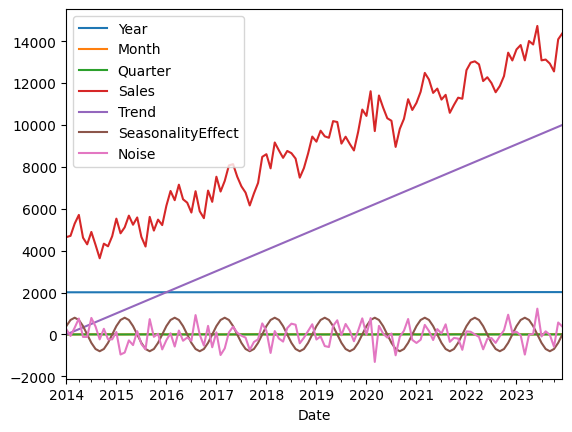

In [2]:
df =pd.read_csv("monthly_sales_forecasting_dataset.csv", parse_dates=['Date'], index_col='Date')
print(df.head())
df.plot()

Date
2014-01-01    4648.36
2014-02-01    4707.72
2014-03-01    5291.91
2014-04-01    5706.44
2014-05-01    4619.06
Freq: MS, Name: Sales, dtype: float64


<Axes: xlabel='Date'>

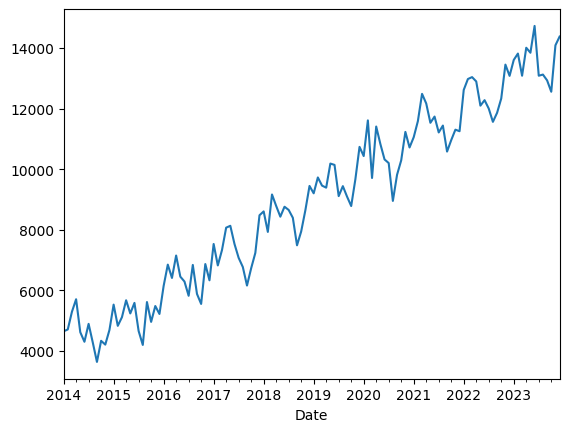

In [3]:
#Resample data
ts= df['Sales'].resample('MS').sum()
print(ts.head())
ts.plot()

Stationarity Check

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

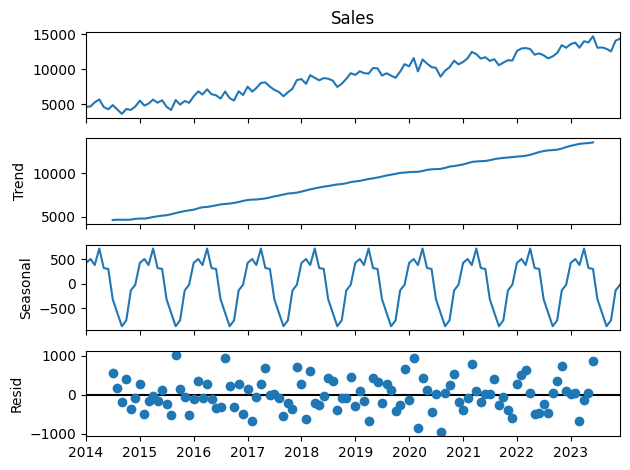

In [5]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [6]:
adftest= adfuller(ts)
print('pvalue of adfuller test is:',adftest[1])

pvalue of adfuller test is: 0.9918388520862199


Train test split

In [7]:
 len(ts)

120

In [8]:
train=ts[:90]
test= ts[90:]

ARIMA MODEL

In [9]:
'''ARIMA model has 3 components:
1.AR
2.MA
3.Integrated

for building ARIMA model we need-
AR order p
MA order q
integrated order d'''

'ARIMA model has 3 components:\n1.AR\n2.MA\n3.Integrated\n\nfor building ARIMA model we need-\nAR order p\nMA order q\nintegrated order d'

Hyperparameters for ARIMA model

In [10]:
  p=0
  d=1
  q=0 #Finding the parameters further

building ARIMA model

In [11]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [12]:
model= ARIMA(train, order=(5,0,4)).fit()

Predict test Dataset

In [13]:
pred=model.predict(start=len(train), end=(len(ts)-1))

In [14]:
pred.head()


,predicted_mean
2021-07-01,11595.244068
2021-08-01,11860.388553
2021-09-01,11656.332132
2021-10-01,11447.082825
2021-11-01,11395.292072


Model evaluation

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
error=np.sqrt(mean_squared_error(test,pred))
print('RMSE value is:',error)

RMSE value is: 2108.2836971899906


In [17]:
test.mean(), np.sqrt(test.var())

(np.float64(12671.865333333333), np.float64(1081.8209481614413))

<Axes: xlabel='Date'>

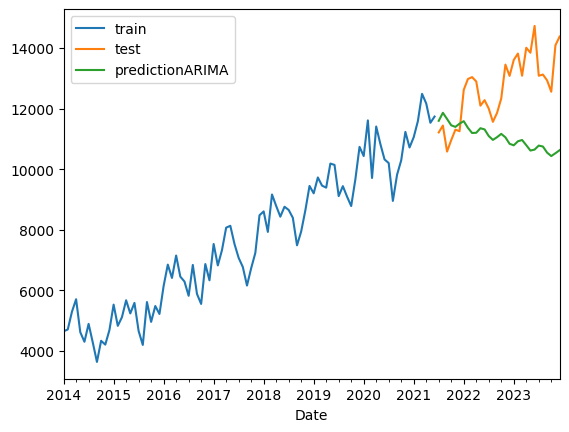

In [18]:
train.plot(legend =True, label='train')
test.plot(legend=True, label='test')
pred.plot(legend=True, label='predictionARIMA')

predict future data

In [19]:
final_model=ARIMA(ts, order=(5,0,4)).fit()
prediction=final_model.predict(len(ts), len(ts)+12)

<Axes: xlabel='Date'>

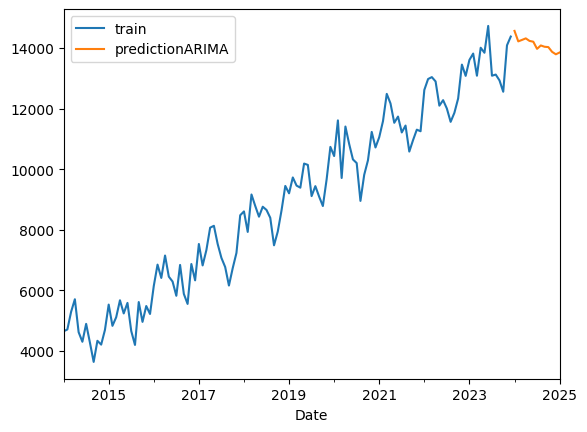

In [20]:
ts.plot(legend=True, label='train')
prediction.plot(legend=True, label='predictionARIMA')

ACF and PACF

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

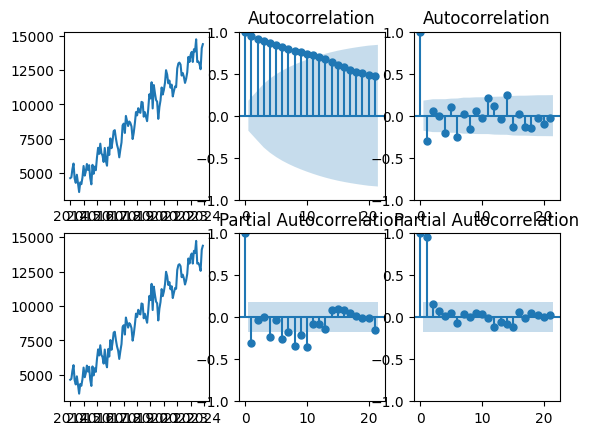

In [22]:
fig, axes=plt.subplots(2,3)
axes[0,0].plot(ts)
plot_acf(ts, ax=axes[0,1])
plot_acf(ts.diff().dropna(), ax=axes[0,2])
axes[1,0].plot(ts)
plot_pacf(ts.diff().dropna(), ax=axes[1,1])
plot_pacf(ts.dropna(), ax=axes[1,2])
plt.show()

to get ARIMA parameters

In [23]:
import itertools

In [24]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [25]:
pdq_combination=list(itertools.product(p, d, q))

In [26]:
len(pdq_combination)

128

In [27]:
rmse=[]
order1=[]

In [28]:
for pdq in pdq_combination:

  try:
    model=ARIMA(train, order=pdq).fit()
    pred=model.predict(start=len(train), end=(len(ts)-1))
    error=np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

In [29]:
result=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
result.to_csv("ARIMA_result.csv")